<H1> ACTIVITY #2 :UK ACCIDENTS </H1>
<hr>
<h3> Analysts : Quert Russel Lalisan</h3>

In [1]:
import numpy as np
import matplotlib as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

import warnings
warnings.filterwarnings("ignore")

In [2]:
accident = pd.read_csv('dataset\\uk_road_accident.csv')

In [3]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [4]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [5]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [6]:
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mean())
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mean())
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna(accident['Road_Surface_Conditions'].mode()[0])
accident['Road_Type'] = accident['Road_Type'].fillna(accident['Road_Type'].mode()[0])
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])
accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna(accident['Weather_Conditions'].mode()[0])

<h1> CLearing Any Inconsistencies with the Data Set</h1>

In [7]:
accident['Accident Date'] = accident['Accident Date'].str.strip()

accident['Accident Date'] = accident['Accident Date'].astype('str')

accident['Accident Date'] = accident['Accident Date'].str.replace('/', '-')

accident['Accident Date'] = pd.to_datetime(accident['Accident Date'], dayfirst = True, errors = 'coerce')

In [8]:
accident['Year'] = accident['Accident Date'].dt.year
accident['Month'] = accident['Accident Date'].dt.month
accident['Day'] = accident['Accident Date'].dt.day
accident['DayOfWeek'] = accident['Accident Date'].dt.dayofweek

In [9]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
Year                       0
Month                      0
Day                        0
DayOfWeek                  0
dtype: int64

<h1> Questions and Insights</h1>

<h1>1) What is the overall distribution of Accident Severity (e.g., Fatal, Serious, Slight)?</h1>

In [10]:
accident['Accident_Severity'].value_counts()

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

<h2>Insights 1 ) : The overall distribution of Accidents severity are </h2>
<h4>from the lowest being Fatal with 8661 recorded accidents<br>from the middle range being Serious with 88217 recorded accidents<br>from the lowest being Fatal with 563801 recorded accidents</h4>

<h1>2) Which District Area reports the highest number of severe accidents?</h1>

In [11]:
accident.groupby('Accident_Severity')['District Area'].value_counts()

Accident_Severity  District Area           
Fatal              Birmingham                  105
                   Leeds                        93
                   Highland                     88
                   East Riding of Yorkshire     85
                   Bradford                     71
                                              ... 
Slight             Berwick-upon-Tweed          121
                   Shetland Islands            113
                   Teesdale                    110
                   Orkney Islands               96
                   Clackmannanshire             72
Name: count, Length: 1266, dtype: int64

In [12]:
accident[accident['Accident_Severity'] == 'Fatal']['District Area'].describe()

count           8661
unique           422
top       Birmingham
freq             105
Name: District Area, dtype: object

In [13]:
accident[accident['Accident_Severity'] == 'Serious']['District Area'].describe()

count          88217
unique           422
top       Birmingham
freq            1474
Name: District Area, dtype: object

<h2>Insights 2) : The District Area with highest Severity of accident  is <b>"Birmingham"</b> </h2>
<h4> With a toal value of <b> 105 Fatal accidents </b> only in Birmingham <br> and a total value of <b> 1474 Fatal accidents  </b>in Birmingham </h4>

<h1>3) How does the number of casualties differ by Accident Severity?</h1>

In [14]:
accident.groupby('Accident_Severity')['Number_of_Casualties'].describe()

,count,mean,std,min,25%,50%,75%,max
Accident_Severity,,,,,,,,
Fatal,8661.0,1.903129,1.901614,1.0,1.0,1.0,2.0,68.0
Serious,88217.0,1.467280,1.027915,1.0,1.0,1.0,2.0,45.0
Slight,563801.0,1.331402,0.754502,1.0,1.0,1.0,1.0,47.0


In [15]:
accident.groupby('Accident_Severity')['Number_of_Casualties'].mean()

Accident_Severity
Fatal      1.903129
Serious    1.467280
Slight     1.331402
Name: Number_of_Casualties, dtype: float64

<h2> Insights 3 ) : The number of Casualties by Accident severity (Serious, Slight, Fatal) </h2>
<h4> Most accidents across all severity levels involve only one casualty, but Fatal accidents tend to have more people affected on average (≈1.9 per accident) compared to Serious (≈1.5) and Slight (≈1.3). This suggests that when an accident is fatal, it is more likely to involve multiple casualties, and although rare, some accidents can result in extremely high casualty counts (up to 68).</h4>

<h1>4) On average, how many vehicles are involved in accidents by severity level?</h1>

In [16]:
accident.groupby('Accident_Severity')['Number_of_Vehicles'].describe()

,count,mean,std,min,25%,50%,75%,max
Accident_Severity,,,,,,,,
Fatal,8661.0,1.786976,1.022719,1.0,1.0,2.0,2.0,28.0
Serious,88217.0,1.678327,0.751475,1.0,1.0,2.0,2.0,19.0
Slight,563801.0,1.855864,0.700571,1.0,1.0,2.0,2.0,32.0


In [17]:
accident.groupby('Accident_Severity')['Number_of_Vehicles'].mean()

Accident_Severity
Fatal      1.786976
Serious    1.678327
Slight     1.855864
Name: Number_of_Vehicles, dtype: float64

<h2> Insights 4) : </h2> 
 <h4>   <br> For every severity level there is an average of <b>1.786976 vehicles</b> for cases that has severity of fatal, <b>1.678327 vehicles</b> for cases that are serious, whilst on Slight <b> 1.855864 vehicles</b> involve in accidents</h4>

<h1>5) Which dates had the highest accident counts?</h1>

In [18]:
accident['Accident Date'].value_counts()

Accident Date
2019-11-30    704
2019-01-31    697
2019-07-13    692
2021-11-13    692
2019-08-14    688
             ... 
2022-12-30    171
2019-12-25    157
2022-12-25    145
2022-01-10    123
2020-12-25    118
Name: count, Length: 1461, dtype: int64

<h2> Insights 5) : The top 3 dates with the highest accidents occured are the following  </h2>
<h4>- November 11, 2019 </b> with <b> 704 accidents </b> that happened <br>  <b>- January 1, 2019 </b> with <b> 697 accidents </b> that occured<br> <b>- July 13, 2019 </b> with <b> 692 accidents </b> that occured</h4>

<h1>6) Is accident severity correlated with the number of casualties??</h1>

In [19]:
accident.describe()

,Accident Date,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles,Year,Month,Day,DayOfWeek
count,660679,660679.000000,660679.000000,660679.000000,660679.000000,660679.000000,660679.000000,660679.000000,660679.000000
mean,2020-11-30 08:30:32.761749760,52.553866,-1.431210,1.357040,1.831255,2020.409090,6.607965,15.581350,3.111195
min,2019-01-01 00:00:00,49.914430,-7.516225,1.000000,1.000000,2019.000000,1.000000,1.000000,0.000000
25%,2019-11-27 00:00:00,51.490696,-2.332191,1.000000,1.000000,2019.000000,4.000000,8.000000,1.000000
50%,2020-11-13 00:00:00,52.315755,-1.411761,1.000000,2.000000,2020.000000,7.000000,16.000000,3.000000
75%,2021-11-17 00:00:00,53.453444,-0.232901,1.000000,2.000000,2021.000000,10.000000,23.000000,5.000000
max,2022-12-31 00:00:00,60.757544,1.762010,68.000000,32.000000,2022.000000,12.000000,31.000000,6.000000
std,NaN,1.406896,1.383302,0.824847,0.715269,1.109152,3.420701,8.764863,1.927284


In [20]:
groups = [
    grp.index.values
    for name, grp in accident.groupby("Accident_Severity")
]

f_stat, p_val = f_oneway(*groups)

print("F-statistic:", f_stat)
print("p-value:", p_val)

F-statistic: 16.46205778233313
p-value: 7.092466280735782e-08


<h2> Insights 6) </h2>
<h4>: The results show that there is a clear difference between the accident severity groups. The very small p-value means the differences are not due to chance. This suggests that the factor we tested is strongly linked to the level of accident severity. </h4>

<h1>7) Do accidents cluster more in urban or rural areas?</h1>

In [21]:
accident['Urban_or_Rural_Area'].value_counts()

Urban_or_Rural_Area
Urban          421678
Rural          238990
Unallocated        11
Name: count, dtype: int64

<h2> Insights 7) </h2>
<h4>: According to the Data accidents usually happens on Urban areas with 421,678 cases of accidents and 238,990 cases on Rural areas </h4>

<h1>8) Is there a correlation between the number of vehicles involved and the number of casualties?</h1>

In [22]:
accident['Number_of_Vehicles'].corr(accident['Number_of_Casualties'])

np.float64(0.22888886126927557)

<h2> Insights 8) :</h2>
    <h4> There is a <b> Weak positive correlation (0.22) </b> between The number of Vehicles involved and the number of casualties as the results showed </h4>

<h1>9) How do Weather Conditions impact accident severity?</h1>

In [23]:
accident.groupby('Accident_Severity')['Weather_Conditions'].describe()

,count,unique,top,freq
Accident_Severity,,,,
Fatal,8661,8,Fine no high winds,7207
Serious,88217,8,Fine no high winds,73285
Slight,563801,8,Fine no high winds,454521


<h2> Insights 9) : </h2>
    <h4> The weather doesn't seem to impact the Severity of accidents, as most accidents happens during <b> Fine no high winds </b> rather than what was thought to be rainy days</h4>

<h1>10) What is the relationship between Light Conditions (daylight, darkness, streetlights) and accidents?</h1>

In [24]:
from scipy.stats import f_oneway

groups = [
    grp["Number_of_Casualties"].dropna().values
    for name, grp in accident.groupby("Light_Conditions")
]

f_stat, p_val = f_oneway(*groups)

print("F-statistic:", f_stat)
print("p-value:", p_val)


F-statistic: 534.4033532420921
p-value: 0.0


In [25]:
acc = accident['Light_Conditions'].value_counts()
acc

Light_Conditions
Daylight                       484880
Darkness - lights lit          129335
Darkness - no lighting          37437
Darkness - lighting unknown      6484
Darkness - lights unlit          2543
Name: count, dtype: int64

<h2> Insights 10) : </h2>
<h4> According to the data There is a lot more accidents that happens on Broad Daylight as it was during night hours when there are no Lights</h>

<h2> Insights 11) : </h2>
<h4> According to the data the is no relation between Light conditions and accident</h4>

<h1>11) Do Road Surface Conditions (dry, wet, icy) affect the number of casualties?</h1>

In [26]:
accident.groupby('Road_Surface_Conditions')['Number_of_Casualties'].describe()

,count,mean,std,min,25%,50%,75%,max
Road_Surface_Conditions,,,,,,,,
Dry,448547.0,1.334545,0.794438,1.0,1.0,1.0,1.0,45.0
Flood over 3cm. deep,1017.0,1.495575,0.977216,1.0,1.0,1.0,2.0,9.0
Frost or ice,18517.0,1.348815,0.838040,1.0,1.0,1.0,1.0,48.0
Snow,5890.0,1.359593,0.765221,1.0,1.0,1.0,2.0,18.0
Wet or damp,186708.0,1.411064,0.890931,1.0,1.0,1.0,2.0,68.0


<h2> Insights 12) </h2>
<h4> Road surface conditions does affect the number of Casualties, Having dry roads having the most amount of accidents occured compare to Wet,damp or snowy roads</h4>

<h1>12) Which Road Type (single carriageway, dual carriageway, roundabout, etc.) has the most accidents?</h1>

In [27]:
accident['Road_Type'].value_counts()

Road_Type
Single carriageway    496663
Dual carriageway       99424
Roundabout             43992
One way street         13559
Slip road               7041
Name: count, dtype: int64

<h2> Insigths 13) : </h2>
<h2> The type of road that has the most frequent accidents are <b> Single Carriageway </b> with a total number accidents of 496,663 </h2>

<h1>13) Which Vehicle Type is most frequently involved in accidents?</h1>

In [28]:
accident['Vehicle_Type'].value_counts()

Vehicle_Type
Car                                      497992
Van / Goods 3.5 tonnes mgw or under       34160
Bus or coach (17 or more pass seats)      25878
Motorcycle over 500cc                     25657
Goods 7.5 tonnes mgw and over             17307
Motorcycle 125cc and under                15269
Taxi/Private hire car                     13294
Motorcycle over 125cc and up to 500cc      7656
Motorcycle 50cc and under                  7603
Goods over 3.5t. and under 7.5t            6096
Other vehicle                              5637
Minibus (8 - 16 passenger seats)           1976
Agricultural vehicle                       1947
Pedal cycle                                 197
Data missing or out of range                  6
Ridden horse                                  4
Name: count, dtype: int64

<h2> Insights 14) :</h2>
<h4> Vehicles such as Cars, Van and Bus are the top 3 most frequently used vehicles that are involved in accidents. Car having <b> 497,992 involved accidents </b>, Van having <b> 34,160 involved accidents </b>, and Bus having<b> 25,878 involved accidents </b></h4>

<h1>14) Do motorcycles vs. cars show higher casualty counts?</h1>

In [29]:
car = accident[accident['Vehicle_Type'] == 'Car'].count().sum()
motor = accident[accident['Vehicle_Type'] == 'Motorcycle over 500cc'].count().sum()

print(f'The amount accidents that happens on motorcycles are {motor}, while cars has {car}')

The amount accidents that happens on motorcycles are 461826, while cars has 8963856


<h2> Insights 15) </h2>
<h4> According to the data Cars shows a higher casualty counts having <b> 896,3856 </b> of casualties, over Motorcylces with <b> 461,826 </b> number of casualties </h4>

<h1>15) What is the relationship between Number of Vehicles and Number of Casualties in an accident?</h1>

In [30]:
accident['Number_of_Vehicles'].corr(accident['Number_of_Casualties'])

np.float64(0.22888886126927557)

In [31]:
accident.groupby('Number_of_Vehicles')['Number_of_Casualties'].count()

Number_of_Vehicles
1     200787
2     391995
3      52806
4      11300
5       2464
6        758
7        296
8        147
9         57
10        27
11        12
12         7
13         6
14         9
15         1
16         4
19         1
28         1
32         1
Name: Number_of_Casualties, dtype: int64

<h2> Insights 16) :</h2><h4> There is a moderate positive correlation (r = 0.23) between the number of vehicles involved and the number of casualties. On average, single-vehicles accidents tend to result in more casualties than single-vehicle accidents.</h4>

<h1>16) Are there particular District Areas where heavy vehicles cause more severe accidents?</h1>

In [32]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  object        
 1   Accident_Severity        660679 non-null  object        
 2   Accident Date            660679 non-null  datetime64[ns]
 3   Latitude                 660679 non-null  float64       
 4   Light_Conditions         660679 non-null  object        
 5   District Area            660679 non-null  object        
 6   Longitude                660679 non-null  float64       
 7   Number_of_Casualties     660679 non-null  int64         
 8   Number_of_Vehicles       660679 non-null  int64         
 9   Road_Surface_Conditions  660679 non-null  object        
 10  Road_Type                660679 non-null  object        
 11  Urban_or_Rural_Area      660679 non-null  object        
 12  Weather_Conditio

In [33]:
heavy_vehicles = [
    'Bus or coach (17 or more pass seats)',
    'Van / Goods 3.5 tonnes mgw or under',
    'Motorcycle over 500cc',
    'Goods over 3.5t. and under 7.5t',
    'Agricultural vehicle',
    'Minibus (8 - 16 passenger seats)'
]

# Filter for heavy vehicles
cars = accident[accident['Vehicle_Type'].isin(heavy_vehicles)]

accident_severe = cars.groupby(
    ['Vehicle_Type', 'Accident_Severity']
).size().reset_index(name='Count')

top_severe = accident_severe.sort_values(by='Count', ascending=False)

print(top_severe.head(10)) 
print(f"total number of accident involving heavy cars on district areas is {accident_severe.value_counts().sum()}")

                            Vehicle_Type Accident_Severity  Count
17   Van / Goods 3.5 tonnes mgw or under            Slight  29139
5   Bus or coach (17 or more pass seats)            Slight  22180
14                 Motorcycle over 500cc            Slight  21861
8        Goods over 3.5t. and under 7.5t            Slight   5172
16   Van / Goods 3.5 tonnes mgw or under           Serious   4554
13                 Motorcycle over 500cc           Serious   3457
4   Bus or coach (17 or more pass seats)           Serious   3373
11      Minibus (8 - 16 passenger seats)            Slight   1671
2                   Agricultural vehicle            Slight   1644
7        Goods over 3.5t. and under 7.5t           Serious    857
total number of accident involving heavy cars on district areas is 18


In [34]:
heavy_vehicles = [
    'Bus or coach (17 or more pass seats)',
    'Van / Goods 3.5 tonnes mgw or under',
    'Motorcycle over 500cc',
    'Goods over 3.5t. and under 7.5t',
    'Agricultural vehicle',
    'Minibus (8 - 16 passenger seats)'
]

ays = accident[
    (accident['Vehicle_Type'].isin(heavy_vehicles)) &
    (accident['Accident_Severity'].isin(['Fatal', 'Serious']))
][['District Area', 'Accident_Severity']]

# Count combinations
ays.value_counts()

District Area    Accident_Severity
Birmingham       Serious              257
Westminster      Serious              171
Leeds            Serious              161
Sheffield        Serious              128
Bradford         Serious              107
                                     ... 
Mid Devon        Fatal                  1
Medway           Fatal                  1
Mansfield        Fatal                  1
Castle Point     Fatal                  1
West Lancashire  Fatal                  1
Name: count, Length: 794, dtype: int64

<h2> Insights 17) : </h2> <h4> The districts area that has large amount of severe accidents (Fatal and Serious) involving heavy vehicles such as bus etc. are Birmingham District Area with 257 Serious Accidents and Westminster with 171 </h4>

<h2>Insights 18) : </h2><h4> Van has the most amount of severe accidents involve, that totals to 29,139. Next to it is are bus with 22,180 severe cases </h4>

<h1>17) Compare Urban vs. Rural accident severity distributions.</h1>

In [35]:
accident.groupby('Accident_Severity')['Urban_or_Rural_Area'].count()

Accident_Severity
Fatal        8661
Serious     88217
Slight     563801
Name: Urban_or_Rural_Area, dtype: int64

<h2> Insights 19): </h2> <h4>According to the data Rural places has the most Fatal accidents, whereas Urban areas have the most serious and slight severity recorded cases of accidents </h4>

<h1>18) Do weather conditions combined with light conditions (e.g., rain at night) show higher accident severity?</h1>

In [36]:
accident.groupby(['Light_Conditions', 'Weather_Conditions'])['Accident_Severity'].value_counts()

Light_Conditions             Weather_Conditions     Accident_Severity
Darkness - lighting unknown  Fine + high winds      Slight                 49
                                                    Serious                 7
                                                    Fatal                   3
                             Fine no high winds     Slight               4614
                                                    Serious               662
                                                                         ... 
Daylight                     Snowing + high winds   Serious                50
                                                    Fatal                   1
                             Snowing no high winds  Slight               3163
                                                    Serious               292
                                                    Fatal                  20
Name: count, Length: 113, dtype: int64

In [37]:
accident.groupby(['Light_Conditions', 'Weather_Conditions'])['Accident_Severity'].describe()

count unique     top  \
Light_Conditions            Weather_Conditions                             
Darkness - lighting unknown Fine + high winds          59      3  Slight   
                            Fine no high winds       5333      3  Slight   
                            Fog or mist                65      2  Slight   
                            Other                     186      3  Slight   
                            Raining + high winds      111      3  Slight   
                            Raining no high winds     621      3  Slight   
                            Snowing + high winds       15      1  Slight   
                            Snowing no high winds      94      2  Slight   
Darkness - lights lit       Fine + high winds        1852      3  Slight   
                            Fine no high winds      93958      3  Slight   
                            Fog or mist               921      3  Slight   
                            Other                    4803      3  Slight   
                            Raining + high winds     3066      3  Slight   
                            Raining no high winds   22666      3  Slight   
                            Snowing + high winds      241      3  Slight   
                            Snowing no high winds    1828      3  Slight   
Darkness - lights unlit     Fine + high winds          51      3  Slight   
                            Fine no high winds       1745      3  Slight   
                            Fog or mist                37      3  Slight   
                            Other                     143      2  Slight   
                            Raining + high winds       73      3  Slight   
                            Raining no high winds     459      3  Slight   
                            Snowing + high winds        5      2  Slight   
                            Snowing no high winds      30      2  Slight   
Darkness - no lighting      Fine + high winds         796      3  Slight   
                            Fine no high winds      25251      3  Slight   
                            Fog or mist               862      3  Slight   
                            Other                    1915      3  Slight   
                            Raining + high winds     1423      3  Slight   
                            Raining no high winds    6208      3  Slight   
                            Snowing + high winds      171      3  Slight   
                            Snowing no high winds     811      3  Slight   
Daylight                    Fine + high winds        5796      3  Slight   
                            Fine no high winds     408726      3  Slight   
                            Fog or mist              1643      3  Slight   
                            Other                   10103      3  Slight   
                            Raining + high winds     4942      3  Slight   
                            Raining no high winds   49742      3  Slight   
                            Snowing + high winds      453      3  Slight   
                            Snowing no high winds    3475      3  Slight   

                                                     freq  
Light_Conditions            Weather_Conditions             
Darkness - lighting unknown Fine + high winds          49  
                            Fine no high winds       4614  
                            Fog or mist                59  
                            Other                     154  
                            Raining + high winds       95  
                            Raining no high winds     550  
                            Snowing + high winds       15  
                            Snowing no high winds      86  
Darkness - lights lit       Fine + high winds        1497  
                            Fine no high winds      77944  
                            Fog or mist               773  
                            Other                    4213  
                   

<h2>Insigths 20) : </h2><h4> Weather conditions combined with poor lighting, such as rain, fog, or snow at night, lead to disproportionately higher accident severity, with darkness and lack of road lighting emerging as critical risk factors compared to similar conditions in daylight. </h4>

<h1> 19) What's the deadliest month on the road for the city of London in the year 2020 ?</h1>

In [99]:
# deadly = accident[accident['Accident_Severity'] != 'slight'][['Month']].value_counts()
# deadly.unstack()

# deadly = (accident[(accident['Accident_Severity'] != 'Slight') & (accident['District Area'] == 'City of London')].groupby(['Month', 'Accident_Severity' ]))
# deadly.size().unstack(fill_value=0)

london_deadly = accident[(accident['Accident_Severity'] != 'Slight') & 
                        (accident['District Area'] == 'City of London') & (accident['Year'] == 2020)]

deadly_by_month = london_deadly.groupby(['Month', 'Accident_Severity']).size().unstack(fill_value=0)

deadly_by_month = deadly_by_month.sort_index()

print("Accidents by Month and Severity:")
print(deadly_by_month)


Accidents by Month and Severity:
Accident_Severity  Fatal  Serious
Month                            
1                      0        2
2                      0        6
3                      0        3
4                      0        4
5                      0        5
6                      0        5
7                      0        1
8                      0        4
9                      1        7
10                     0        4
11                     1        3
12                     0        5


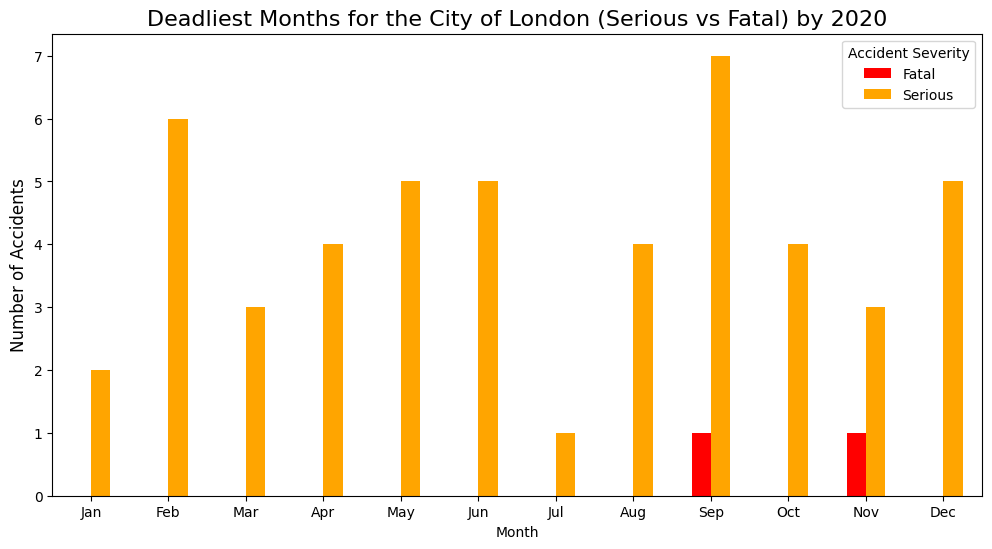

In [109]:

colors = ['red', 'orange']  # Fatal will be red, Serious will be orange
ax = deadly_by_month.plot(kind='bar', 
                         figsize=(12, 6), 
                         color=colors)


plt.title("Deadliest Months for the City of London (Serious vs Fatal) by 2020", fontsize=16)
plt.ylabel("Number of Accidents", fontsize=12)
plt.yticks()
plt.xticks(rotation=360)
plt.xticks(range(0, 12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title="Accident Severity")
plt.show()


<h2> Insights 21) : </h2> <h4> The deadliest month for City of London is: september,
Total serious and fatal accidents: 8 </h4>

<h2> Insights 22 ) : </h2> <h4> The number of severity were low, due to the covid lockdown happening on 2020 </h4>

<h1> Question 20) What yer does the road and weather conditions cause the severity of the accidents</h1>

In [113]:
accident.groupby('Year')[['Weather_Conditions','Road_Surface_Conditions','Accident_Severity']].describe().unstack()

                                 Year
Weather_Conditions       count   2019                182115
                                 2020                170591
                                 2021                163554
                                 2022                144419
                         unique  2019                     8
                                 2020                     8
                                 2021                     8
                                 2022                     8
                         top     2019    Fine no high winds
                                 2020    Fine no high winds
                                 2021    Fine no high winds
                                 2022    Fine no high winds
                         freq    2019                148010
                                 2020                136450
                                 2021                131929
                                 2022                118624
Ro

<h1> Question 21) Is there a correlation between road and weather conditions in the severity of the accidents, on the year 2018</h1>

In [116]:
accident_year = accident.groupby(['Weather_Conditions','Road_Surface_Conditions','Accident_Severity'])

accident_year.corr(accident["Year"])


ValueError: could not convert string to float: '200701KD65034'